13. Develop an LSTM-based model to perform sentiment classification on the IMDB movie reviews dataset using Keras.

In [1]:
# ----------------------------
# 1. Import required libraries
# ----------------------------
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# ----------------------------
# 2. Load and preprocess the IMDB dataset
# ----------------------------
# Use the top 10,000 most frequent words
num_words = 10000
max_len = 200  # Maximum review length (truncate/pad)

(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=num_words)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# ----------------------------
# 3. Define the LSTM model
# ----------------------------
model = models.Sequential([
    # Embedding Layer: Converts word indices into dense vectors
    layers.Embedding(input_dim=num_words, output_dim=128, input_length=max_len),

    # LSTM Layer
    layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),

    # Fully Connected Output Layer
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
# ----------------------------
# 4. Compile the model
# ----------------------------
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# ----------------------------
# 5. Train the model
# ----------------------------
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 149s 714ms/step - accuracy: 0.6758 - loss: 0.5812 - val_accuracy: 0.8340 - val_loss: 0.3824
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 138s 703ms/step - accuracy: 0.8597 - loss: 0.3429 - val_accuracy: 0.8548 - val_loss: 0.3499
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 137s 701ms/step - accuracy: 0.8900 - loss: 0.2782 - val_accuracy: 0.8303 - val_loss: 0.3840
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 136s 693ms/step - accuracy: 0.8949 - loss: 0.2658 - val_accuracy: 0.8549 - val_loss: 0.3566
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 138s 707ms/step - accuracy: 0.9106 - loss: 0.2267 - val_accuracy: 0.8480 - val_loss: 0.3835


In [6]:
# ----------------------------
# 6. Evaluate the model
# ----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")

782/782 - 84s - 107ms/step - accuracy: 0.8480 - loss: 0.3835
✅ Test Accuracy: 0.8480


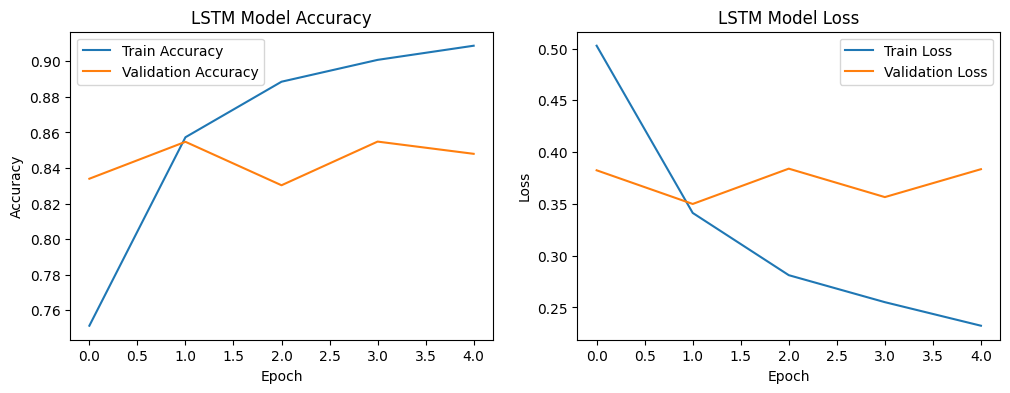

In [7]:
# ----------------------------
# 7. Plot accuracy and loss
# ----------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

| Layer               | Description                                                                           |
| ------------------- | ------------------------------------------------------------------------------------- |
| **Embedding Layer** | Transforms word indices into 128-dimensional dense vectors (learned during training). |
| **LSTM Layer**      | Processes sequences, capturing context and long-term dependencies in reviews.         |
| **Dense Layer**     | Outputs sentiment probability (sigmoid → 0 for negative, 1 for positive).             |
